In [163]:
%run init.ipynb

# Bell's basis

In [4]:
def BBasis(matrix, *pos):
    lst = list(pos)
    x = len(matrix)
    n = int(log(x, 2))
    psi_mod = copy.deepcopy(matrix)
    psi_f = Matrix([0]*2**n)
    for j in range(x):
        char = list('{:0{}b}'.format(j, math.ceil(math.log(x, 2))))
        # 00 = phi_plus, 01 = phi_minus, 10 = psi_plus, 11 = psi_minus
        phi_plus = (1/sqrt(2)) * (pbk(''.join(char[:n-1-lst[0][0]]) + '00' + ''.join(char[n-lst[0][1]:]))\
                          + pbk(''.join(char[:n-1-lst[0][0]]) + '11' + ''.join(char[n-lst[0][1]:])))
        phi_minus = (1/sqrt(2)) * (pbk(''.join(char[:n-1-lst[0][0]]) + '00' + ''.join(char[n-lst[0][1]:]))\
                          - pbk(''.join(char[:n-1-lst[0][0]]) + '11' + ''.join(char[n-lst[0][1]:])))
        psi_plus = (1/sqrt(2)) * (pbk(''.join(char[:n-1-lst[0][0]]) + '01' + ''.join(char[n-lst[0][1]:]))\
                          + pbk(''.join(char[:n-1-lst[0][0]]) + '10' + ''.join(char[n-lst[0][1]:])))
        psi_minus = (1/sqrt(2)) * (pbk(''.join(char[:n-1-lst[0][0]]) + '01' + ''.join(char[n-lst[0][1]:]))\
                          - pbk(''.join(char[:n-1-lst[0][0]]) + '10' + ''.join(char[n-lst[0][1]:])))
        if char[n-1-lst[0][0]] == str(0) and char[n-1-lst[0][1]] == str(0):
            psi_f = psi_mod[j] * phi_plus + psi_f
            psi_mod[j] = 0
        if char[n-1-lst[0][0]] == str(1) and char[n-1-lst[0][1]] == str(1):
            psi_f = psi_mod[j] * phi_minus + psi_f
            psi_mod[j] = 0
        if char[n-1-lst[0][0]] == str(0) and char[n-1-lst[0][1]] == str(1):
            psi_f = psi_mod[j] * psi_plus + psi_f
            psi_mod[j] = 0
        if char[n-1-lst[0][0]] == str(1) and char[n-1-lst[0][1]] == str(0):
            psi_f = psi_mod[j] * psi_minus + psi_f
            psi_mod[j] = 0
    psi_f = psi_f + psi_mod
    return psi_f

In [5]:
def change_to_BB(matrix, *pos):
    lst = list(pos)
    matrix_aux = copy.deepcopy(matrix)
    for j in range(len(lst)):
        matrix_aux = BBasis(matrix_aux, lst[j])
    val, poss, poss_bin, order = [], [], [], [[]]
    if isinstance(matrix_aux, sympy.matrices.dense.MutableDenseMatrix):
        n_linhas, n_colunas = matrix_aux.shape
        if n_colunas == 1:
            Psi = 0
            x = len(matrix_aux)
            n = int(math.log(x)/math.log(2))
            pos_t = n-1-lst[0][0]
            for i in range(x):
                if matrix_aux[i] != 0:
                    val.append(matrix_aux[i])
                    poss_bin.append(format(i, f'0{int(math.log(x)/math.log(2))}b'))
            for i in range(len(val)):
                order = []
                for j in range(len(lst)):
                    if poss_bin[i][n-1-lst[j][0]] == str('0') and poss_bin[i][n-1-lst[j][1]] == str('0'):
                        order.append(poss_bin[i][:n-1-lst[j][0]] + 'aa' + poss_bin[i][n-lst[j][1]:])
                    if poss_bin[i][n-1-lst[j][0]] == str('1') and poss_bin[i][n-1-lst[j][1]] == str('1'):
                        order.append(poss_bin[i][:n-1-lst[j][0]] + 'bb' + poss_bin[i][n-lst[j][1]:])
                    if poss_bin[i][n-1-lst[j][0]] == str('0') and poss_bin[i][n-1-lst[j][1]] == str('1'):
                        order.append(poss_bin[i][:n-1-lst[j][0]] + 'cc' + poss_bin[i][n-lst[j][1]:])
                    if poss_bin[i][n-1-lst[j][0]] == str('1') and poss_bin[i][n-1-lst[j][1]] == str('0'):
                        order.append(poss_bin[i][:n-1-lst[j][0]] + 'dd' + poss_bin[i][n-lst[j][1]:])
                    if j < len(lst):
                        poss_bin.pop(i)
                        poss_bin.insert(i, order[j])
                string = order[-1]
                string = string.replace("aa", "\Phi_{+}").replace("bb", "\Phi_{-}")\
                            .replace("cc", "\Psi_{+}").replace("dd", "\Psi_{-}")
                Psi += val[i]*Ket(string)
            return Psi

# $S_z$-, $S_x$- and $S_y$-basis

In [6]:
"""
Interesting function to say exactly which matrix values
are different from zero and at the same time have a visualization
of the state vector as if it were written in Dirac notation
"""
def pbk(seq, dim=2, mtype=0):
    """
    Args:
        seq (str): input sequence. Ex: '010110'
        dim (int): computational basis dimension (default=2 for qubits)
        mtype (int): array type, column array or row array. Zero (default=0) for
            row matrix and one (1) for row matrix

    Returns:
        array: ket vector for the input sequence in the computational basis of dimension 'dim'
    """
    vec = []
    for digito in seq:
        vec.append(digito)
    n = len(vec)
    if vec[0] == '+':
        psi = (1/sqrt(2))*(cb(dim, 0) + cb(dim, 1))
    elif vec[0] == '-':
        psi = (1/sqrt(2))*(cb(dim, 0) - cb(dim, 1))
    elif vec[0] == 'r':
        psi = (1/sqrt(2))*(cb(dim, 0) + 1j*cb(dim, 1))
    elif vec[0] == 'l':
        psi = (1/sqrt(2))*(cb(dim, 0) - 1j*cb(dim, 1))
    else:
        psi = cb(dim, int(vec[0]))
    for j in range(1,n):
        if vec[j] == '+':
            psi = (1/sqrt(2))*(tp(psi,cb(dim, 0)) + tp(psi,cb(dim, 1)))
        elif vec[j] == '-':
            psi = (1/sqrt(2))*(tp(psi,cb(dim, 0)) - tp(psi,cb(dim, 1)))
        elif vec[j] == 'r':
            psi = (1/sqrt(2))*(tp(psi,cb(dim, 0)) + 1j*tp(psi,cb(dim, 1)))
        elif vec[j] == 'l':
            psi = (1/sqrt(2))*(tp(psi,cb(dim, 0)) - 1j*tp(psi,cb(dim, 1)))
        else:
            psi = tp(psi,cb(dim, int(vec[j])))
    if mtype == 1:
        return transpose(psi).as_mutable()
    return psi

In [7]:
def xyzBasis(matrix, *pos, base='x'):
    lst = list(pos)
    x = len(matrix)
    n = int(log(x, 2))
    psi_mod = copy.deepcopy(matrix)
    psi_f = Matrix([0]*2**n)
    for j in range(x):
        char = list('{:0{}b}'.format(j, math.ceil(math.log(x, 2))))
        if base == 'x':
            plus =  (1/sqrt(2)) * (pbk(''.join(char[:n-1-lst[0]]) + '0' + ''.join(char[n-lst[0]:]))\
                                 + pbk(''.join(char[:n-1-lst[0]]) + '1' + ''.join(char[n-lst[0]:])))
            minus = (1/sqrt(2)) * (pbk(''.join(char[:n-1-lst[0]]) + '0' + ''.join(char[n-lst[0]:]))\
                                 - pbk(''.join(char[:n-1-lst[0]]) + '1' + ''.join(char[n-lst[0]:])))
        if base == 'y':
            plus  =  (1/sqrt(2)) * (pbk(''.join(char[:n-1-lst[0]]) + '0' + ''.join(char[n-lst[0]:]))\
                                  + pbk(''.join(char[:n-1-lst[0]]) + '1' + ''.join(char[n-lst[0]:])))
            minus =  (-1j/sqrt(2))*(pbk(''.join(char[:n-1-lst[0]]) + '0' + ''.join(char[n-lst[0]:]))\
                                  - pbk(''.join(char[:n-1-lst[0]]) + '1' + ''.join(char[n-lst[0]:])))
        if char[n-1-lst[0]] == str(0):
            #print('1st')
            psi_f = psi_mod[j] * plus + psi_f
            psi_mod[j] = 0
        if char[n-1-lst[0]] == str(1):
            #print('2nd')
            psi_f = psi_mod[j] * minus + psi_f
            psi_mod[j] = 0
    psi_f = psi_f + psi_mod
    return psi_f

In [8]:
def mbk_xyz(matrix, *bpos):
    base = [t[0] for t in bpos]
    lst = [t[1:] for t in bpos]
    matrix_aux = copy.deepcopy(matrix)
    for j in range(len(base)):
        for k in range(len(lst[j])):
            matrix_aux = xyzBasis(matrix_aux, lst[j][k], base=base[j])
    val, poss, poss_bin, order = [], [], [], [[]]
    if isinstance(matrix_aux, sympy.matrices.dense.MutableDenseMatrix):
        n_linhas, n_colunas = matrix_aux.shape
        if n_colunas == 1:
            Psi = 0
            x = len(matrix_aux)
            n = int(math.log(x)/math.log(2))
            for i in range(x):
                if matrix_aux[i] != 0:
                    val.append(matrix_aux[i])
                    poss_bin.append(format(i, f'0{int(math.log(x)/math.log(2))}b'))
            for i in range(len(base)):
                for j in range(len(val)):
                    order = []
                    for k in range(len(lst[i])):
                        if base[i] == 'x':
                            if poss_bin[j][n-1-lst[i][k]] == str('0'):
                                order.append(poss_bin[j][:n-1-lst[i][k]] + 'a' + poss_bin[j][n-lst[i][k]:])
                            elif poss_bin[j][n-1-lst[i][k]] == str('1'):
                                order.append(poss_bin[j][:n-1-lst[i][k]] + 'b' + poss_bin[j][n-lst[i][k]:])
                        if base[i] == 'y':
                            if poss_bin[j][n-1-lst[i][k]] == str('0'):
                                order.append(poss_bin[j][:n-1-lst[i][k]] + 'c' + poss_bin[j][n-lst[i][k]:])
                            elif poss_bin[j][n-1-lst[i][k]] == str('1'):
                                order.append(poss_bin[j][:n-1-lst[i][k]] + 'd' + poss_bin[j][n-lst[i][k]:])
                        if k < len(lst):
                            poss_bin.pop(j)
                            poss_bin.insert(j,order[k])
                    if i == len(base)-1:
                        string = order[-1]
                        string = string.replace("a", "+").replace("b", "-")\
                                .replace("c", "\oplus").replace("d", "\ominus")
                        Psi += val[j]*Ket(string)
            return Psi

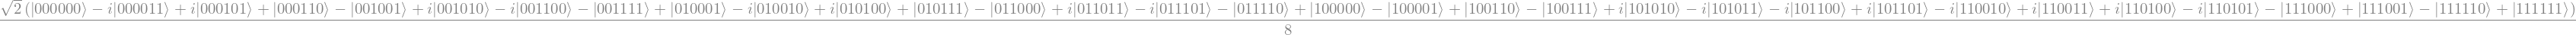

In [9]:
ψ = (1/2)*(pbk('0+-rl+') + pbk('0-+lr-') + pbk('1+-rl-') + pbk('1-+lr-'))
mysim(mbk(ψ))

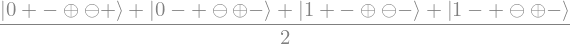

In [10]:
mysim(mbk_xyz(ψ, ('y', 1,2), ('x', 3,4,0)))

# $S_z$-, $S_x$- and $S_y$-basis ans Bell Basis

In [189]:
"""
Interesting function to say exactly which matrix values
are different from zero and at the same time have a visualization
of the state vector as if it were written in Dirac notation
"""
def pbk(seq, dim=2, mtype=0):
    """
    Args:
        seq (str): input sequence. Ex: '010110'
        dim (int): computational basis dimension (default=2 for qubits)
        mtype (int): array type, column array or row array. Zero (default=0) for
            row matrix and one (1) for row matrix

    Returns:
        array: ket vector for the input sequence in the computational basis of dimension 'dim'
    """
    vec = []
    for digito in seq:
        vec.append(digito)
    n = len(vec)
    if vec[0] == '+':
        psi = (1/sqrt(2))*(cb(dim, 0) + cb(dim, 1))
    elif vec[0] == '-':
        psi = (1/sqrt(2))*(cb(dim, 0) - cb(dim, 1))
    elif vec[0] == 'r':
        psi = (1/sqrt(2))*(cb(dim, 0) + 1j*cb(dim, 1))
    elif vec[0] == 'l':
        psi = (1/sqrt(2))*(cb(dim, 0) - 1j*cb(dim, 1))
    elif vec[0] == 'P':
        psi = (1/sqrt(2))*(tp(cb(dim, 0), cb(dim, 0)) + tp(cb(dim, 1),cb(dim, 1)))
    elif vec[0] == 'Q':
        psi = (1/sqrt(2))*(tp(cb(dim, 0), cb(dim, 0)) - tp(cb(dim, 1),cb(dim, 1)))
    elif vec[0] == 'R':
        psi = (1/sqrt(2))*(tp(cb(dim, 0), cb(dim, 1)) + tp(cb(dim, 1),cb(dim, 0)))
    elif vec[0] == 'S':
        psi = (1/sqrt(2))*(tp(cb(dim, 0), cb(dim, 1)) - tp(cb(dim, 1),cb(dim, 0)))
    else:
        psi = cb(dim, int(vec[0]))
    for j in range(1,n):
        if vec[j] == '+':
            psi = (1/sqrt(2))*(tp(psi,cb(dim, 0)) + tp(psi,cb(dim, 1)))
        elif vec[j] == '-':
            psi = (1/sqrt(2))*(tp(psi,cb(dim, 0)) - tp(psi,cb(dim, 1)))
        elif vec[j] == 'r':
            psi = (1/sqrt(2))*(tp(psi,cb(dim, 0)) + 1j*tp(psi,cb(dim, 1)))
        elif vec[j] == 'l':
            psi = (1/sqrt(2))*(tp(psi,cb(dim, 0)) - 1j*tp(psi,cb(dim, 1)))
        elif vec[j] == 'P':
            psi = (1/sqrt(2))*tp(psi,(tp(cb(dim, 0), cb(dim, 0)) + tp(cb(dim, 1),cb(dim, 1))))
        elif vec[j] == 'Q':
            psi = (1/sqrt(2))*tp(psi,(tp(cb(dim, 0), cb(dim, 0)) - tp(cb(dim, 1),cb(dim, 1))))
        elif vec[j] == 'R':
            psi = (1/sqrt(2))*tp(psi,(tp(cb(dim, 0), cb(dim, 1)) + tp(cb(dim, 1),cb(dim, 0))))
        elif vec[j] == 'S':
            psi = (1/sqrt(2))*tp(psi,(tp(cb(dim, 0), cb(dim, 1)) - tp(cb(dim, 1),cb(dim, 0))))
        else:
            psi = tp(psi,cb(dim, int(vec[j])))
    if mtype == 1:
        return transpose(psi).as_mutable()
    return psi

In [190]:
def mbk_xyzBB(matrix, *bpos):
    base = [t[0] for t in bpos]
    lst = [t[1:] for t in bpos]
    matrix_aux = copy.deepcopy(matrix)
    for j in range(len(base)):
        if base[j] == 'x' or base[j] == 'y':
            for k in range(len(lst[j])):
                matrix_aux = xyzBasis(matrix_aux, lst[j][k], base=base[j])
        elif base[j] == 'BB':
            for k in range(len(lst[j])):
                matrix_aux = BBasis(matrix_aux, lst[j][k])
    val, poss, poss_bin, order = [], [], [], [[]]
    if isinstance(matrix_aux, sympy.matrices.dense.MutableDenseMatrix):
        n_linhas, n_colunas = matrix_aux.shape
        if n_colunas == 1:
            Psi = 0
            x = len(matrix_aux)
            n = int(math.log(x)/math.log(2))
            for i in range(x):
                if matrix_aux[i] != 0:
                    val.append(matrix_aux[i])
                    poss_bin.append(format(i, f'0{int(math.log(x)/math.log(2))}b'))
            for i in range(len(base)):
                for j in range(len(val)):
                    order = []
                    for k in range(len(lst[i])):
                        if base[i] == 'x':
                            if poss_bin[j][n-1-lst[i][k]] == str('0'):
                                order.append(poss_bin[j][:n-1-lst[i][k]] + 'a' + poss_bin[j][n-lst[i][k]:])
                            elif poss_bin[j][n-1-lst[i][k]] == str('1'):
                                order.append(poss_bin[j][:n-1-lst[i][k]] + 'b' + poss_bin[j][n-lst[i][k]:])
                        if base[i] == 'y':
                            if poss_bin[j][n-1-lst[i][k]] == str('0'):
                                order.append(poss_bin[j][:n-1-lst[i][k]] + 'c' + poss_bin[j][n-lst[i][k]:])
                            elif poss_bin[j][n-1-lst[i][k]] == str('1'):
                                order.append(poss_bin[j][:n-1-lst[i][k]] + 'd' + poss_bin[j][n-lst[i][k]:])
                        if base[i] == 'BB':
                            if poss_bin[j][n-1-lst[i][k][0]] == str('0') and poss_bin[j][n-1-lst[i][k][1]] == str('0'):
                                order.append(poss_bin[j][:n-1-lst[i][k][0]] + 'PP' + poss_bin[j][n-lst[i][k][1]:])
                            if poss_bin[j][n-1-lst[i][k][0]] == str('1') and poss_bin[j][n-1-lst[i][k][1]] == str('1'):
                                order.append(poss_bin[j][:n-1-lst[i][k][0]] + 'QQ' + poss_bin[j][n-lst[i][k][1]:])
                            if poss_bin[j][n-1-lst[i][k][0]] == str('0') and poss_bin[j][n-1-lst[i][k][1]] == str('1'):
                                order.append(poss_bin[j][:n-1-lst[i][k][0]] + 'RR' + poss_bin[j][n-lst[i][k][1]:])
                            if poss_bin[j][n-1-lst[i][k][0]] == str('1') and poss_bin[j][n-1-lst[i][k][1]] == str('0'):
                                order.append(poss_bin[j][:n-1-lst[i][k][0]] + 'SS' + poss_bin[j][n-lst[i][k][1]:])
                        if k < len(lst):
                            poss_bin.pop(j)
                            poss_bin.insert(j,order[k])
                    if i == len(base)-1:
                        string = order[-1]
                        string = string.replace("a", "+").replace("b", "-")\
                                .replace("c", "\oplus").replace("d", "\ominus")\
                                .replace("PP", "\Phi_{+}").replace("QQ", "\Phi_{-}")\
                                .replace("RR", "\Psi_{+}").replace("SS", "\Psi_{-}")
                        Psi += val[j]*Ket(string)
            return Psi

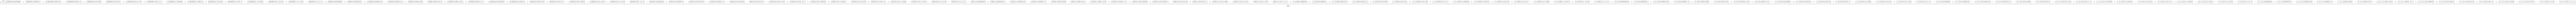

In [206]:
ψ = (1/sqrt(2))*(pbk('P-Rl+r0') + pbk('P+Rr-l1'))
mysim(mbk(ψ))

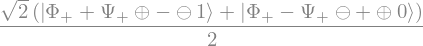

In [207]:
mysim( mbk_xyzBB( ψ, ('y', 3, 1), ('BB', (8,7), (5,4)), ('x', 6, 2) ) )

## Just `mbk` with specific base

In [151]:
import re
"""
Interesting function to say exactly which matrix values
are different from zero and at the same time have a visualization
of the state vector as if it were written in Dirac notation
"""
def pbk(seq, dim=2, mtype=0, prnt=0):
    """
    Args:
        seq (str): input sequence. Ex: '010110'
        dim (int): computational basis dimension (default=2 for qubits)
        mtype (int): array type, column array or row array. Zero (default=0) for
            row matrix and one (1) for row matrix

    Returns:
        array: ket vector for the input sequence in the computational basis of dimension 'dim'
    """
    if prnt==0:
        vec = []
        for digito in seq:
            vec.append(digito)
        n = len(vec)
        if vec[0] == '+':
            psi = (1/sqrt(2))*(cb(dim, 0) + cb(dim, 1))
        elif vec[0] == '-':
            psi = (1/sqrt(2))*(cb(dim, 0) - cb(dim, 1))
        elif vec[0] == 'r':
            psi = (1/sqrt(2))*(cb(dim, 0) + 1j*cb(dim, 1))
        elif vec[0] == 'l':
            psi = (1/sqrt(2))*(cb(dim, 0) - 1j*cb(dim, 1))
        elif vec[0] == 'P':
            psi = (1/sqrt(2))*(tp(cb(dim, 0), cb(dim, 0)) + tp(cb(dim, 1),cb(dim, 1)))
        elif vec[0] == 'Q':
            psi = (1/sqrt(2))*(tp(cb(dim, 0), cb(dim, 0)) - tp(cb(dim, 1),cb(dim, 1)))
        elif vec[0] == 'R':
            psi = (1/sqrt(2))*(tp(cb(dim, 0), cb(dim, 1)) + tp(cb(dim, 1),cb(dim, 0)))
        elif vec[0] == 'S':
            psi = (1/sqrt(2))*(tp(cb(dim, 0), cb(dim, 1)) - tp(cb(dim, 1),cb(dim, 0)))
        else:
            psi = cb(dim, int(vec[0]))
        for j in range(1,n):
            if vec[j] == '+':
                psi = (1/sqrt(2))*(tp(psi,cb(dim, 0)) + tp(psi,cb(dim, 1)))
            elif vec[j] == '-':
                psi = (1/sqrt(2))*(tp(psi,cb(dim, 0)) - tp(psi,cb(dim, 1)))
            elif vec[j] == 'r':
                psi = (1/sqrt(2))*(tp(psi,cb(dim, 0)) + 1j*tp(psi,cb(dim, 1)))
            elif vec[j] == 'l':
                psi = (1/sqrt(2))*(tp(psi,cb(dim, 0)) - 1j*tp(psi,cb(dim, 1)))
            elif vec[j] == 'P':
                psi = (1/sqrt(2))*tp(psi,(tp(cb(dim, 0), cb(dim, 0)) + tp(cb(dim, 1),cb(dim, 1))))
            elif vec[j] == 'Q':
                psi = (1/sqrt(2))*tp(psi,(tp(cb(dim, 0), cb(dim, 0)) - tp(cb(dim, 1),cb(dim, 1))))
            elif vec[j] == 'R':
                psi = (1/sqrt(2))*tp(psi,(tp(cb(dim, 0), cb(dim, 1)) + tp(cb(dim, 1),cb(dim, 0))))
            elif vec[j] == 'S':
                psi = (1/sqrt(2))*tp(psi,(tp(cb(dim, 0), cb(dim, 1)) - tp(cb(dim, 1),cb(dim, 0))))
            else:
                psi = tp(psi,cb(dim, int(vec[j])))
        if mtype == 1:
            return transpose(psi).as_mutable()
        return psi
    elif prnt==1:
        vec = []
        Psi = 0
        for digito in seq:
            vec.append(digito)
        for j in range(len(vec)):
            if vec[j]=="r":
                vec[j] = "\\oplus"
            else:
                vec[j] = vec[j].replace("P", "\Phi_{+}").replace("Q", "\Phi_{-}")\
                           .replace("R", "\Psi_{+}").replace("S", "\Psi_{-}")\
                           .replace("l", "\ominus")
        for j in range(len(vec)):
            if j==0:
                Psi = Ket(vec[j])
            else:
                Psi = tp(Psi, Ket(vec[j]))
        return Psi

In [152]:
ψ = pbk("PQ0+r10l-1RS", prnt=1)
ψ

In [153]:
ψ = tp(pbk("P", prnt=1), pbk("Q", prnt=1), pbk("R", prnt=1), pbk("S", prnt=1))
ψ

## Just `mbk` with specific base 2

In [179]:
import re
"""
Interesting function to say exactly which matrix values
are different from zero and at the same time have a visualization
of the state vector as if it were written in Dirac notation
"""
def pbk(seq, mtype=0):
    """
    Args:
        seq (str): input sequence. Ex: '010110'
        dim (int): computational basis dimension (default=2 for qubits)
        mtype (int): array type, column array or row array. Zero (default=0) for
            row matrix and one (1) for row matrix

    Returns:
        array: ket vector for the input sequence in the computational basis of dimension 'dim'
    """
    vec = []
    for digito in seq:
        vec.append(digito)
    n = len(vec)
    if vec[0] == '+':
        psi = (1/sqrt(2))*(cb(dim, 0) + cb(dim, 1))
    elif vec[0] == '-':
        psi = (1/sqrt(2))*(cb(dim, 0) - cb(dim, 1))
    elif vec[0] == 'r':
        psi = (1/sqrt(2))*(cb(dim, 0) + 1j*cb(dim, 1))
    elif vec[0] == 'l':
        psi = (1/sqrt(2))*(cb(dim, 0) - 1j*cb(dim, 1))
    elif vec[0] == 'P':
        psi = (1/sqrt(2))*(tp(cb(dim, 0), cb(dim, 0)) + tp(cb(dim, 1),cb(dim, 1)))
    elif vec[0] == 'Q':
        psi = (1/sqrt(2))*(tp(cb(dim, 0), cb(dim, 0)) - tp(cb(dim, 1),cb(dim, 1)))
    elif vec[0] == 'R':
        psi = (1/sqrt(2))*(tp(cb(dim, 0), cb(dim, 1)) + tp(cb(dim, 1),cb(dim, 0)))
    elif vec[0] == 'S':
        psi = (1/sqrt(2))*(tp(cb(dim, 0), cb(dim, 1)) - tp(cb(dim, 1),cb(dim, 0)))
    else:
        psi = cb(dim, int(vec[0]))
    for j in range(1,n):
        if vec[j] == '+':
            psi = (1/sqrt(2))*(tp(psi,cb(dim, 0)) + tp(psi,cb(dim, 1)))
        elif vec[j] == '-':
            psi = (1/sqrt(2))*(tp(psi,cb(dim, 0)) - tp(psi,cb(dim, 1)))
        elif vec[j] == 'r':
            psi = (1/sqrt(2))*(tp(psi,cb(dim, 0)) + 1j*tp(psi,cb(dim, 1)))
        elif vec[j] == 'l':
            psi = (1/sqrt(2))*(tp(psi,cb(dim, 0)) - 1j*tp(psi,cb(dim, 1)))
        elif vec[j] == 'P':
            psi = (1/sqrt(2))*tp(psi,(tp(cb(dim, 0), cb(dim, 0)) + tp(cb(dim, 1),cb(dim, 1))))
        elif vec[j] == 'Q':
            psi = (1/sqrt(2))*tp(psi,(tp(cb(dim, 0), cb(dim, 0)) - tp(cb(dim, 1),cb(dim, 1))))
        elif vec[j] == 'R':
            psi = (1/sqrt(2))*tp(psi,(tp(cb(dim, 0), cb(dim, 1)) + tp(cb(dim, 1),cb(dim, 0))))
        elif vec[j] == 'S':
            psi = (1/sqrt(2))*tp(psi,(tp(cb(dim, 0), cb(dim, 1)) - tp(cb(dim, 1),cb(dim, 0))))
        else:
            psi = tp(psi,cb(dim, int(vec[j])))
    if mtype == 1:
        return transpose(psi).as_mutable()
    return psi

['P', 'Q']
['\\Phi_{+}', '\\Phi_{-}']
PQ
['P', 'Q']


['P', 'R']
['\\Phi_{+}', '\\Psi_{+}']
PR
['P', 'R']


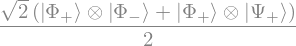

In [180]:
ψ = (1/sqrt(2))*(pbk("PQ", prnt=1) + pbk("PR", prnt=1))
mysim(ψ)

In [156]:
ψ = tp(pbk("P", prnt=1), pbk("Q", prnt=1), pbk("R", prnt=1), pbk("S", prnt=1))
ψ

## Just `mbk` with specific base 3

In [181]:
"""
Interesting function to say exactly which matrix values
are different from zero and at the same time have a visualization
of the state vector as if it were written in Dirac notation
"""
def mbk_pbk(seq, mtype=0):
    """
    Args:
        seq (str): input sequence. Ex: '010110'
        dim (int): computational basis dimension (default=2 for qubits)
        mtype (int): array type, column array or row array. Zero (default=0) for
            row matrix and one (1) for row matrix

    Returns:
        array: ket vector for the input sequence in the computational basis of dimension 'dim'
    """
    vec = []
    Psi = 0
    for digito in seq:
        vec.append(digito)
    for j in range(len(vec)):
        if vec[j]=="r":
            vec[j] = "\\oplus"
        else:
            vec[j] = vec[j].replace("P", "\Phi_{+}").replace("Q", "\Phi_{-}")\
                       .replace("R", "\Psi_{+}").replace("S", "\Psi_{-}")\
                       .replace("l", "\ominus")
    string = ''.join(vec)
    string2 = string.replace("\Phi_{+}", "P").replace("\Phi_{-}", "Q")\
                       .replace("\Psi_{+}", "R").replace("\Psi_{-}", "S")\
                       .replace("\ominus", "l").replace("\oplus", "r")
    for j in range(len(vec)):
        if j==0:
            Psi = Ket(vec[j])
        else:
            Psi = tp(Psi, Ket(vec[j]))
    return Psi

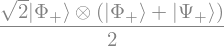

In [186]:
ψ = (1/sqrt(2))*tp(mbk_pbk("P"),(mbk_pbk("P") + mbk_pbk("R")))
mysim(ψ)

In [187]:
ψ = mbk_pbk("PQRS")
mysim(ψ)

In [172]:
ψ = tp(mbk_pbk("P"), mbk_pbk("Q"), mbk_pbk("R"), mbk_pbk("S"))
ψ